In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df['year'] = df.Day.apply(lambda x: x.year)
mean_temps = df.groupby(by='year').t.mean()
mean_temps[mean_temps == mean_temps.min()].index[0], mean_temps[mean_temps == mean_temps.max()].index[0]

(2012, 2015)

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [5]:
df['month'] = df.Day.apply(lambda x: x.month)
pos_jan_temp_counts = df[(df.month == 1) & (df.t >= 0)].groupby(by='year').t.count()
pos_jan_temp_counts[pos_jan_temp_counts == pos_jan_temp_counts.max()].index[0]

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [6]:
mean_summer_temps = df[df.month.isin([6, 7, 8])].groupby(by='year').t.mean()
mean_summer_temps[mean_summer_temps == mean_summer_temps.min()].index[0]

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [7]:
df['delta'] = abs(df.t - df.t.shift(-1))
df[df.delta == df.delta.max()].Day.values[0]

numpy.datetime64('2014-05-26T00:00:00.000000000')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

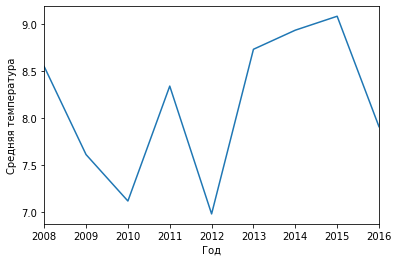

In [8]:
mean_temps.plot()
plt.xlabel('Год')
plt.ylabel('Средняя температура')
plt.show()